In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#  Check Missing values

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

# Check Duplicates

In [8]:
df.duplicated().sum()

0

#### There is no duplicate data in the dataset

# CHECKING OUTLIERS

## 1. Math Score

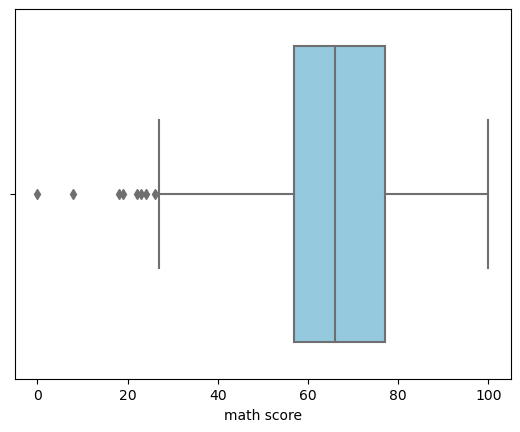

In [12]:
sns.boxplot(x=df["math score"], color='skyblue')
plt.show()

In [21]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

low1, up1 = outlier_thresholds(df, "math score") 

print(df[(df["math score"] < low1) | (df["math score"] > up1)])

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24             38         

##### The outliers for the math score are: 17, 59, 145, 338, 466, 787, 842, 980

we can either delete the outliers or change the value with the threshold values, Here we are going to change the values to the threshold values

In [22]:
def replace_with_thresholds(dataframe, variable, low_limit, up_limit):
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "math score", low1, up1)

In [26]:
print(df[(df["math score"] < low1) | (df["math score"] > up1)].any(axis = None))

False


##### This false shows no more outliers are present in th column math score

## 2. Reading Score

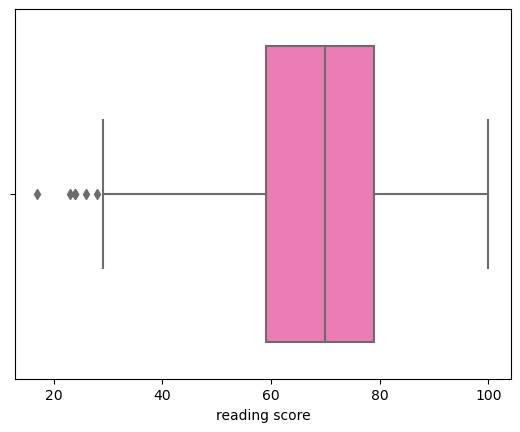

In [13]:
sns.boxplot(x=df["reading score"], color='hotpink')
plt.show()

In [28]:
low2, up2 = outlier_thresholds(df, "reading score") 

print(df[(df["reading score"] < low2) | (df["reading score"] > up2)])

     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
211    male        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
59                     none          27             17             10  
76                     none          30             26             22  
211                    none          35             28             27  
327                    none          28             23             19  
596                    none          30             24             15  
980                    none          27             24         

##### The outliers for the reading score are: 59, 76, 211, 327, 596, 980

we can either delete the outliers or change the value with the threshold values, Here we are going to change the values to the threshold values

In [30]:
replace_with_thresholds(df, "reading score", low2, up2)

print(df[(df["reading score"] < low2) | (df["reading score"] > up2)].any(axis = None))

False


##### This false shows no more outliers are present in th column math score

#### 3. writing Score

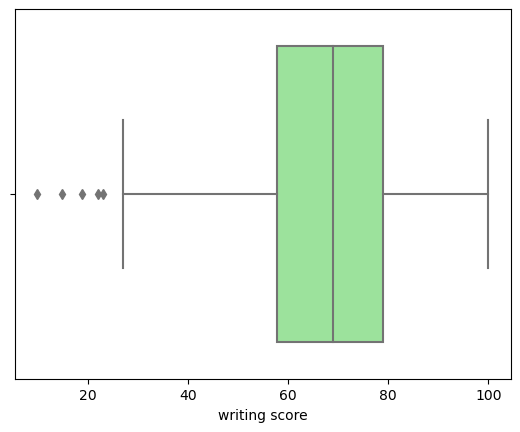

In [15]:
sns.boxplot(x=df["writing score"], color='lightgreen')
plt.show()

In [31]:
low3, up3 = outlier_thresholds(df, "writing score") 

print(df[(df["writing score"] < low3) | (df["writing score"] > up3)])

     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
59                     none          29             29             10  
76                     none          30             29             22  
327                    none          29             29             19  
596                    none          30             29             15  
980                    none          29             29             23  


##### The outliers for the writing score are: 59, 76, 327, 596, 980

we can either delete the outliers or change the value with the threshold values, Here we are going to change the values to the threshold values

In [32]:
replace_with_thresholds(df, "writing score", low3, up3)

print(df[(df["writing score"] < low3) | (df["writing score"] > up3)].any(axis = None))

False


### this false indicates no more outliers are present in writing section

## Showing the boxplot after removing the 